# Linear Regression Assignment (Bike Sharing Assignment)

## Step 1: Data Preparation

### 1. Importing the libraries

In [160]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split

### 2. Reading and Understanding the data

In [161]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [162]:
df.shape

(730, 16)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [164]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 3. Sanity Check

In [165]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [166]:
df.weekday.value_counts()

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

In [167]:
df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

##### Chekking for missing values

In [168]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Checking for the duplicates

In [169]:
#Creating a copy of the original 
df_dup = df
df_dup.drop_duplicates(subset=None, inplace=True)
#Checking the dataframe
df_dup.shape

(730, 16)

##### Inference:
- We can clearly see that there are no Missing/Null values.
- We can see the same number of rows and columns as on the original dataset, so there are no duplicates.

### 4.Cleaning the data

In [170]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

- After checking the data dictionary, we can remove the unnecessary variables like 'casual', 'registered', 'instant', 'dteday' as they are not significant

In [171]:
varlist=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'cnt']

In [172]:
df_new=df[varlist]

In [173]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 5. Adding dummy variables

- For the non binary categorical varialbes we create dummy variables
- For that we need to check the data type of the variabale

In [174]:
# Viewing the dataset before conversion
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [175]:
# convert into categories
df_new.season=df_new.season.astype('category')
df_new.weekday=df_new.weekday.astype('category')
df_new.weathersit=df_new.weathersit.astype('category')
df_new.mnth=df_new.mnth.astype('category')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [176]:
#creating dummies for the category variable
#we also drop the first variable as (n-1)
df_new=pd.get_dummies(df_new, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [177]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


## Step 2:  Exploratory Data Analysis

### Visualising the numerical variables

In [178]:
#cheking of the numerical variables
df_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [179]:
# selecting numerical variable
num_vars=df_new[['temp', 'atemp', 'hum', 'windspeed',
       'cnt', ]]
num_vars.head()


,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


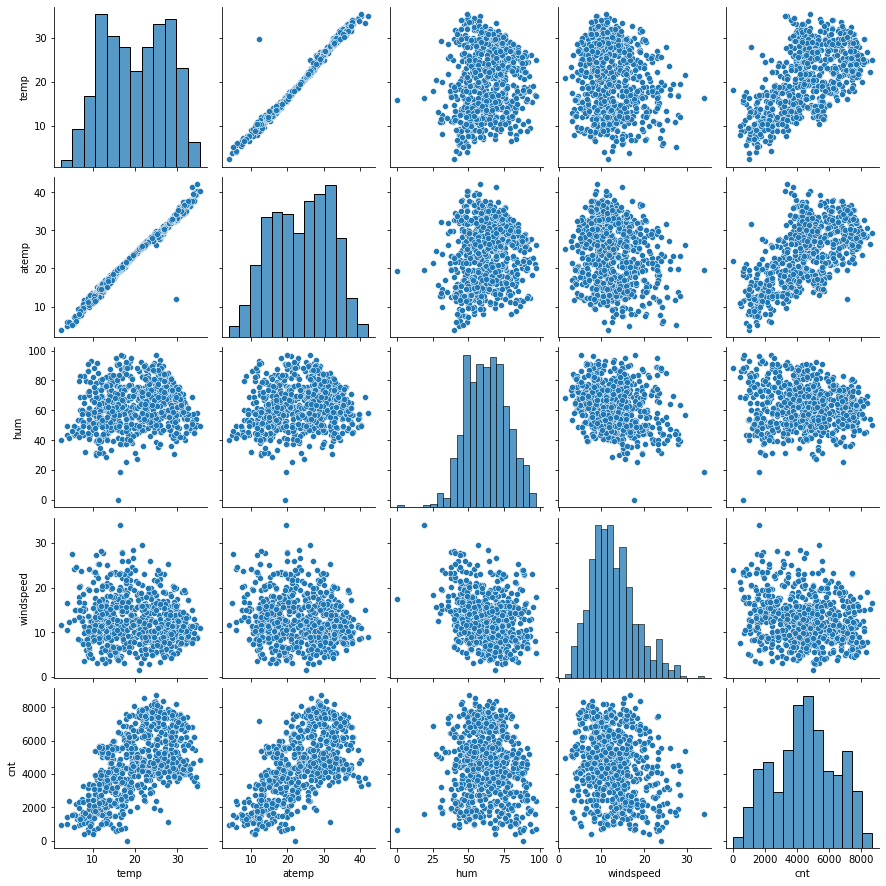

In [180]:
#Creating a pairplot
sns.pairplot(num_vars)
plt.show()

#### Inference:
- We can see that there is some relationship between the followings:
    -  temp and cnt variables
    -  atemp and cnt variables

### 2. Visualising the categorical variables

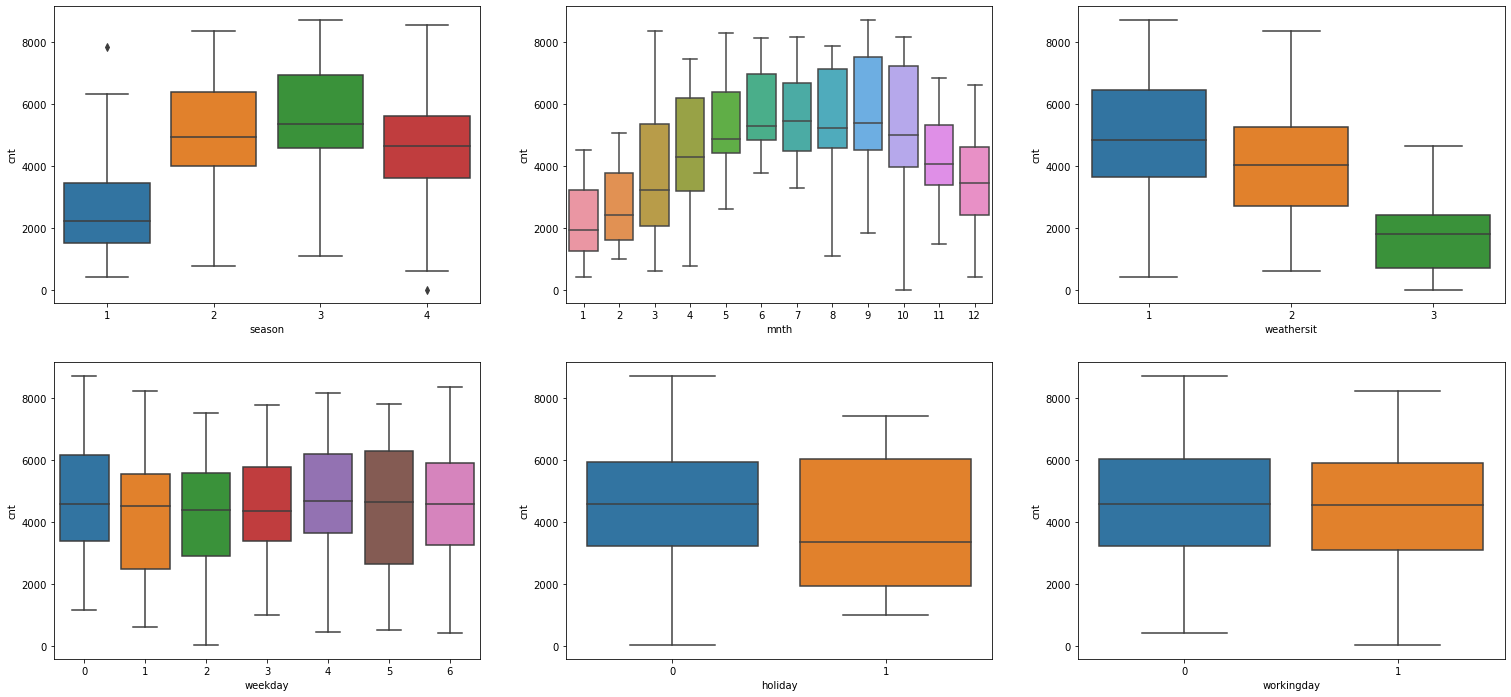

In [181]:
#creating boxplots for each categories
plt.figure(figsize=(26,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='weathersit',y='cnt', data=df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt', data=df)

plt.subplot(2,3,5)
sns.boxplot(x='holiday',y='cnt', data=df)

plt.subplot(2,3,6)
sns.boxplot(x='workingday',y='cnt', data=df)

plt.show()


#### Inference:
- In the Season boxplot, we can see highest bookings around 5000 in season 3. 
- In the Month boxplot we can see the trend followoing, there is good demand which is over 4000 in May to Oct.
- In the weather boxplot, there is good demand in weather 1 which amounts to around 5000 bookings compared to others.
- In weekday boxplot, we can see that there seems no trend in the weekdays so we can exclude this variable for the prediction.
- In holiday boxplot, most of the bike boooking were happening when it is not a holiday indicating holiday cannot be a good predictor for the dependent variable.
- In workingday boxplot, we can see maximum bookings happening between 4000 and 6000.


### 3. Correlation Matrix using heatmap

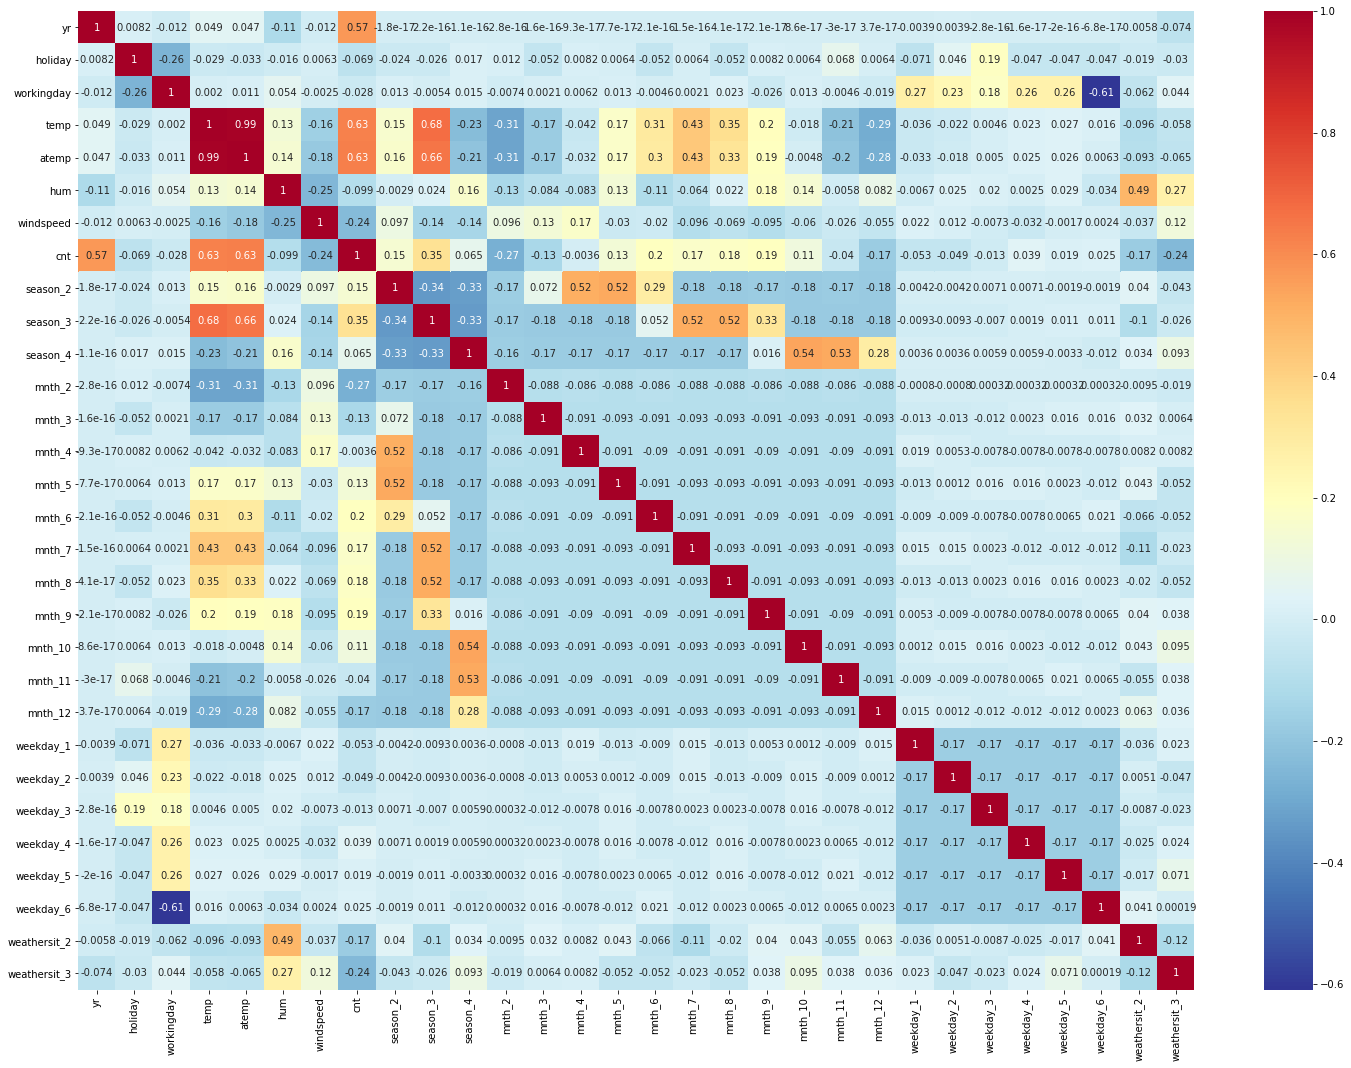

In [182]:
# Checking the correlation among different variables 
plt.figure(figsize=(25,18))
sns.heatmap(df_new.corr(), annot=True, cmap='RdYlBu_r')
plt.show()

#### Inference:
- From the heatmap, we can conclude that there seems high collinearity between some of the variables such as 'cnt, temp', 'season_3, temp', 'temp, atemp'.

## Step 3: Performing Multiple Linear Regression

### Split the data into Training and Testing set

In [183]:
df_new.shape

(730, 30)

In [184]:
# Splitting the data using the train_test_split method
df_train, df_test = train_test_split(df_new, train_size=0.7, test_size=0.3, random_state=0)

In [185]:
# Checking the shape of train and test 
print(df_train.shape)
print(df_test.shape)


(510, 30)
(219, 30)


### Rescalaing the features

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
# Looking the before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,27.606653,31.53460,60.5000,16.958236,5130,0,1,...,0,0,0,0,0,0,1,0,0,0
524,1,0,0,29.144153,32.41835,43.7083,9.667229,7498,1,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,6.765000,7.54415,47.0417,20.167000,1406,0,0,...,0,0,0,0,0,0,0,1,0,0
161,0,0,1,29.725000,33.90190,65.4583,10.374950,4966,1,0,...,0,0,1,0,0,0,0,0,0,0
556,1,0,1,29.383347,32.51355,63.3333,10.166111,7264,0,1,...,0,0,0,0,0,1,0,0,0,0


In [188]:
# Instantiate an object
scaler=MinMaxScaler()
# Create a list for numeric variables
num_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
# checking the dataset after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,0.753859,0.731037,0.488399,0.527988,0.587667,0,1,...,0,0,0,0,0,0,1,0,0,0
524,1,0,0,0.802869,0.755332,0.254640,0.255430,0.860101,1,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0.089497,0.071535,0.301044,0.647940,0.159227,0,0,...,0,0,0,0,0,0,0,1,0,0
161,0,0,1,0.821384,0.796115,0.557424,0.281887,0.568799,1,0,...,0,0,1,0,0,0,0,0,0,0
556,1,0,1,0.810494,0.757949,0.527842,0.274080,0.833180,0,1,...,0,0,0,0,0,1,0,0,0,0


### Dividing into X and Y sets for the model building

In [189]:
# Separating the variables into Independent variable X and target variable y for building the linear model.
y_train=df_train.pop('cnt')
X_train=df_train

### Feature Elimination

#### Using RFE(Recursive Feature Elimination) method

In [190]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [191]:
# Calling the LinearRegression function from SciKit Learn

lm=LinearRegression()
lm.fit(X_train, y_train)

# Running the RFE function
rfe=RFE(lm,15)
rfe=rfe.fit(X_train, y_train)

In [192]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 13),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 15),
 ('mnth_12', False, 12),
 ('weekday_1', False, 10),
 ('weekday_2', False, 9),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 14),
 ('weathersit_2', False, 4),
 ('weathersit_3', True, 1)]

In [193]:
# Storing the 'True' columns from the rfe.support_ list
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9',
       'mnth_10', 'weathersit_3'],
      dtype='object')

In [194]:
# Columns that has been excluded by the rfe.support_
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2'],
      dtype='object')

In [195]:
# Creating X_train df with the RFE selected variables
X_train_rfe=X_train[col]

## Step 4:  Building Linear Model using Stats Model

#### Model 1:

In [196]:

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [197]:
# Adding a constant
X_train_sm1=sm.add_constant(X_train_rfe)
# Creating a first fitted model

lr1=sm.OLS(y_train, X_train_sm1)

In [198]:
#Fitting the model using.fit() function
lr1_model=lr1.fit()
lr1_model.params


const           0.215619
yr              0.219541
holiday        -0.054900
temp           -0.146901
atemp           0.628665
hum            -0.230438
windspeed      -0.126951
season_2        0.118676
season_3        0.082386
season_4        0.147274
mnth_3          0.041780
mnth_5          0.058136
mnth_8          0.046234
mnth_9          0.117693
mnth_10         0.061606
weathersit_3   -0.142856
dtype: float64

In [199]:
# displaying the summary
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.5
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.69e-175
Time:                        23:05:26   Log-Likelihood:                 499.38
No. Observations:                 510   AIC:                            -966.8
Df Residuals:                     494   BIC:                            -899.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2156      0.022      9.792      0.000       0.172       0.259
yr               0.2195      0.008     26.322      0.000       0.203       0.236
holiday         -0.0549      0.024     -2.246      0.025      -0.103      -0.007
temp            -0.1469      0.236     -0.622      0.534      -0.611       0.317
atemp            0.6287      0.249      2.523      0.012       0.139       1.118
hum             -0.2304      0.025     -9.268      0.000      -0.279      -0.182
windspeed       -0.1270      0.024     -5.288      0.000      -0.174      -0.080
season_2         0.1187      0.016      7.400      0.000       0.087       0.150
season_3         0.0824      0.023      3.537      0.000       0.037       0.128
season_4         0.1473      0.015     10.039      0.000       0.118       0.176
mnth_3           0.0418      0.015      2.707      0.007       0.011       0.072
mnth_5           0.0581      0.018      3.245      0.001       0.023       0.093
mnth_8           0.0462      0.018      2.500      0.013       0.010       0.083
mnth_9           0.1177      0.018      6.449      0.000       0.082       0.154
mnth_10          0.0616      0.018      3.363      0.001       0.026       0.098
weathersit_3    -0.1429      0.030     -4.838      0.000      -0.201      -0.085
==============================================================================
Omnibus:                       84.593   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.063
Skew:                          -0.847   Prob(JB):                     6.60e-46
Kurtosis:                       5.631   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
# VIF checking
# Creating a dataframe that contais all the feature variable with its VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,atemp,1015.41
2,temp,981.66
7,season_3,8.31
4,hum,8.11
6,season_2,3.96
5,windspeed,3.35
8,season_4,3.02
0,yr,1.97
11,mnth_8,1.72
13,mnth_10,1.69


#### Inference:
- Removing the 'atemp' variable as it has a very high VIF

#### Model 2

In [201]:
# Dropping the 'temp' columns because of its high VIF and high P value
X_train_new=X_train_rfe.drop(['atemp'], axis=1)


In [202]:
#Adding a constant
X_train_sm2=sm.add_constant(X_train_new)
# Creating a first fitted model
lr2=sm.OLS(y_train, X_train_sm2)

#Fitting the model using.fit() function
lr2_model=lr2.fit()

# displaying the summary result
lr2_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          3.02e-175
Time:                        23:05:26   Log-Likelihood:                 496.11
No. Observations:                 510   AIC:                            -962.2
Df Residuals:                     495   BIC:                            -898.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2353      0.021     11.362      0.000       0.195       0.276
yr               0.2197      0.008     26.200      0.000       0.203       0.236
holiday         -0.0591      0.025     -2.410      0.016      -0.107      -0.011
temp             0.4431      0.033     13.482      0.000       0.379       0.508
hum             -0.2233      0.025     -8.990      0.000      -0.272      -0.174
windspeed       -0.1446      0.023     -6.262      0.000      -0.190      -0.099
season_2         0.1215      0.016      7.555      0.000       0.090       0.153
season_3         0.0800      0.023      3.419      0.001       0.034       0.126
season_4         0.1509      0.015     10.281      0.000       0.122       0.180
mnth_3           0.0420      0.016      2.709      0.007       0.012       0.073
mnth_5           0.0575      0.018      3.192      0.002       0.022       0.093
mnth_8           0.0416      0.019      2.250      0.025       0.005       0.078
mnth_9           0.1156      0.018      6.306      0.000       0.080       0.152
mnth_10          0.0638      0.018      3.465      0.001       0.028       0.100
weathersit_3    -0.1479      0.030     -4.992      0.000      -0.206      -0.090
==============================================================================
Omnibus:                       80.840   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.796
Skew:                          -0.817   Prob(JB):                     3.04e-43
Kurtosis:                       5.558   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
# VIF checking
# Creating a dataframe that contais all the feature variable with its VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,18.00
6,season_3,8.27
3,hum,6.96
5,season_2,3.95
4,windspeed,3.33
7,season_4,2.94
0,yr,1.96
10,mnth_8,1.70
12,mnth_10,1.69
9,mnth_5,1.64


#### Inference:
- Removing 'mnth_8' variable as it has a very P-Value, as technically we should remove 'temp' variable as it has very high VIF but 'temp' is a useful attribute and it is closely related to our prediction.  

#### Model 3

In [204]:
# Dropping the 'mnth_8' columns as it has high P value
X_train_new=X_train_new.drop(['mnth_8'], axis=1)

In [205]:
#Adding a constant
X_train_sm3=sm.add_constant(X_train_new)
# Creating a first fitted model
lr3=sm.OLS(y_train, X_train_sm3)

#Fitting the model using.fit() function
lr3_model=lr3.fit()

# displaying the summary result
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.74e-175
Time:                        23:05:27   Log-Likelihood:                 493.52
No. Observations:                 510   AIC:                            -959.0
Df Residuals:                     496   BIC:                            -899.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2328      0.021     11.212      0.000       0.192       0.274
yr               0.2198      0.008     26.108      0.000       0.203       0.236
holiday         -0.0619      0.025     -2.519      0.012      -0.110      -0.014
temp             0.4416      0.033     13.382      0.000       0.377       0.506
hum             -0.2175      0.025     -8.768      0.000      -0.266      -0.169
windspeed       -0.1434      0.023     -6.188      0.000      -0.189      -0.098
season_2         0.1217      0.016      7.533      0.000       0.090       0.153
season_3         0.0975      0.022      4.397      0.000       0.054       0.141
season_4         0.1521      0.015     10.328      0.000       0.123       0.181
mnth_3           0.0418      0.016      2.681      0.008       0.011       0.072
mnth_5           0.0570      0.018      3.152      0.002       0.021       0.093
mnth_9           0.1010      0.017      5.867      0.000       0.067       0.135
mnth_10          0.0622      0.018      3.369      0.001       0.026       0.098
weathersit_3    -0.1510      0.030     -5.081      0.000      -0.209      -0.093
==============================================================================
Omnibus:                       82.544   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.257
Skew:                          -0.838   Prob(JB):                     1.47e-43
Kurtosis:                       5.545   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
# VIF checking & Creating a dataframe that contais all the feature variable with its VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,temp,17.97
6,season_3,7.33
3,hum,6.90
5,season_2,3.95
4,windspeed,3.32
7,season_4,2.94
0,yr,1.96
11,mnth_10,1.69
9,mnth_5,1.64
10,mnth_9,1.31


#### Inference:
- Due to high VIF Value we can remove 'Season_3' variable.

#### Model 4:



In [207]:
# Dropping the 'Season_3' columns
X_train_new=X_train_new.drop(['season_3'], axis=1)

In [208]:
# Adding Constant
X_train_sm4=sm.add_constant(X_train_new)

# Creating a first model
lr4=sm.OLS(y_train, X_train_sm4)

# fit the model
lr4_model=lr4.fit()
#summary for the model
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     180.3
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.51e-172
Time:                        23:05:27   Log-Likelihood:                 483.77
No. Observations:                 510   AIC:                            -941.5
Df Residuals:                     497   BIC:                            -886.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2236      0.021     10.628      0.000       0.182       0.265
yr               0.2163      0.009     25.346      0.000       0.200       0.233
holiday         -0.0669      0.025     -2.677      0.008      -0.116      -0.018
temp             0.5589      0.020     28.286      0.000       0.520       0.598
hum             -0.2206      0.025     -8.737      0.000      -0.270      -0.171
windspeed       -0.1452      0.024     -6.152      0.000      -0.192      -0.099
season_2         0.0734      0.012      6.084      0.000       0.050       0.097
season_4         0.1219      0.013      9.190      0.000       0.096       0.148
mnth_3           0.0303      0.016      1.936      0.053      -0.000       0.061
mnth_5           0.0434      0.018      2.390      0.017       0.008       0.079
mnth_9           0.1173      0.017      6.853      0.000       0.084       0.151
mnth_10          0.0460      0.018      2.499      0.013       0.010       0.082
weathersit_3    -0.1492      0.030     -4.932      0.000      -0.209      -0.090
==============================================================================
Omnibus:                       67.436   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.640
Skew:                          -0.760   Prob(JB):                     1.58e-29
Kurtosis:                       4.983   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
#Checking the VIF again
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,6.81
2,temp,5.50
4,windspeed,3.29
6,season_4,2.21
5,season_2,2.13
0,yr,1.93
10,mnth_10,1.63
8,mnth_5,1.60
9,mnth_9,1.24
7,mnth_3,1.21


#### Inference:
- Droping the mnth_3 as it has high p value

#### Model 5:

In [210]:
# Dropping the mnth_3
X_train_new=X_train_new.drop(['mnth_3'], axis=1)

In [211]:
# Adding a constant 
X_train_sm5=sm.add_constant(X_train_new)
#Creating the model
lr5=sm.OLS(y_train, X_train_sm5)

#Fit the model
lr5_model=lr5.fit()

#display the summary of the model
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.12e-172
Time:                        23:05:27   Log-Likelihood:                 481.85
No. Observations:                 510   AIC:                            -939.7
Df Residuals:                     498   BIC:                            -888.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2304      0.021     11.082      0.000       0.190       0.271
yr               0.2167      0.009     25.326      0.000       0.200       0.234
holiday         -0.0689      0.025     -2.751      0.006      -0.118      -0.020
temp             0.5501      0.019     28.533      0.000       0.512       0.588
hum             -0.2179      0.025     -8.621      0.000      -0.268      -0.168
windspeed       -0.1450      0.024     -6.127      0.000      -0.191      -0.099
season_2         0.0757      0.012      6.286      0.000       0.052       0.099
season_4         0.1168      0.013      8.959      0.000       0.091       0.142
mnth_5           0.0381      0.018      2.120      0.034       0.003       0.073
mnth_9           0.1157      0.017      6.749      0.000       0.082       0.149
mnth_10          0.0470      0.018      2.547      0.011       0.011       0.083
weathersit_3    -0.1499      0.030     -4.941      0.000      -0.209      -0.090
==============================================================================
Omnibus:                       65.407   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.613
Skew:                          -0.726   Prob(JB):                     9.69e-30
Kurtosis:                       5.044   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
#VIF checking again for the new model
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,6.54
2,temp,5.33
4,windspeed,3.22
6,season_4,2.15
5,season_2,2.11
0,yr,1.92
9,mnth_10,1.63
7,mnth_5,1.56
8,mnth_9,1.23
10,weathersit_3,1.15


#### Inference:
- Dropping the 'hum' as it has high VIF

#### Model 6:

In [213]:
#Dropping the 'hum' variable
X_train_new=X_train_new.drop(['hum'], axis=1)

In [214]:
#Adding a constant
X_train_sm6=sm.add_constant(X_train_new)
# Creating the model
lr6=sm.OLS(y_train, X_train_sm6)
#fit the model
lr6_model=lr6.fit()

#display the summary
lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     180.8
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          7.66e-159
Time:                        23:05:28   Log-Likelihood:                 446.38
No. Observations:                 510   AIC:                            -870.8
Df Residuals:                     499   BIC:                            -824.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1172      0.017      6.788      0.000       0.083       0.151
yr               0.2242      0.009     24.587      0.000       0.206       0.242
holiday         -0.0643      0.027     -2.395      0.017      -0.117      -0.012
temp             0.5318      0.021     25.916      0.000       0.492       0.572
windspeed       -0.0958      0.025     -3.893      0.000      -0.144      -0.047
season_2         0.0706      0.013      5.478      0.000       0.045       0.096
season_4         0.1035      0.014      7.471      0.000       0.076       0.131
mnth_5           0.0151      0.019      0.791      0.429      -0.022       0.052
mnth_9           0.0854      0.018      4.750      0.000       0.050       0.121
mnth_10          0.0370      0.020      1.873      0.062      -0.002       0.076
weathersit_3    -0.2378      0.031     -7.772      0.000      -0.298      -0.178
==============================================================================
Omnibus:                       63.816   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.081
Skew:                          -0.746   Prob(JB):                     2.29e-26
Kurtosis:                       4.825   Cond. No.                         9.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
#Checking VIF again for the new model
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,3.50
3,windspeed,2.95
4,season_2,2.08
0,yr,1.90
5,season_4,1.87
8,mnth_10,1.63
6,mnth_5,1.54
7,mnth_9,1.21
9,weathersit_3,1.08
1,holiday,1.03


#### Inference:
- Dropping the 'mnth_5' as it has high p value

#### Model 7:

In [216]:
# Droppping the 'mnth_5' variable 
X_train_new=X_train_new.drop(['mnth_5'], axis=1)

In [217]:
#Adding a contant for the new model
X_train_sm7=sm.add_constant(X_train_new)
# Creating the model
lr7=sm.OLS(y_train, X_train_sm7)
#fit the model
lr7_model=lr7.fit()
#checking the summary of the model
lr7_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          7.16e-160
Time:                        23:05:28   Log-Likelihood:                 446.06
No. Observations:                 510   AIC:                            -872.1
Df Residuals:                     500   BIC:                            -829.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1172      0.017      6.795      0.000       0.083       0.151
yr               0.2239      0.009     24.584      0.000       0.206       0.242
holiday         -0.0633      0.027     -2.364      0.018      -0.116      -0.011
temp             0.5333      0.020     26.093      0.000       0.493       0.573
windspeed       -0.0975      0.024     -3.983      0.000      -0.146      -0.049
season_2         0.0755      0.011      6.712      0.000       0.053       0.098
season_4         0.1037      0.014      7.483      0.000       0.076       0.131
mnth_9           0.0850      0.018      4.734      0.000       0.050       0.120
mnth_10          0.0368      0.020      1.865      0.063      -0.002       0.076
weathersit_3    -0.2382      0.031     -7.792      0.000      -0.298      -0.178
==============================================================================
Omnibus:                       64.698   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.840
Skew:                          -0.757   Prob(JB):                     1.56e-26
Kurtosis:                       4.816   Cond. No.                         9.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
# checking the VIF for the new model
vif=pd.DataFrame()
vif['Feature']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
2,temp,3.45
3,windspeed,2.91
0,yr,1.90
5,season_4,1.87
7,mnth_10,1.63
4,season_2,1.58
6,mnth_9,1.21
8,weathersit_3,1.08
1,holiday,1.03


#### Inference:
- we can clearly see that 'mth_10' has high p-value, we can drop this variable and make new model

#### Model 8:

In [219]:
# Droping the 'mnth_10' variable
X_train_new=X_train_new.drop(['mnth_10'], axis=1)

In [220]:
# Building the new model
# Adding a constant
X_train_sm8=sm.add_constant(X_train_new)
# Create the new model
lr8=sm.OLS(y_train, X_train_sm8)
#fit the model
lr8_model=lr8.fit()
#display the summary of the new model
lr8_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     224.6
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.60e-160
Time:                        23:05:28   Log-Likelihood:                 444.30
No. Observations:                 510   AIC:                            -870.6
Df Residuals:                     501   BIC:                            -832.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1134      0.017      6.605      0.000       0.080       0.147
yr               0.2234      0.009     24.478      0.000       0.205       0.241
holiday         -0.0653      0.027     -2.433      0.015      -0.118      -0.013
temp             0.5403      0.020     26.842      0.000       0.501       0.580
windspeed       -0.0954      0.025     -3.889      0.000      -0.144      -0.047
season_2         0.0746      0.011      6.618      0.000       0.052       0.097
season_4         0.1175      0.012     10.011      0.000       0.094       0.141
mnth_9           0.0806      0.018      4.516      0.000       0.046       0.116
weathersit_3    -0.2338      0.031     -7.651      0.000      -0.294      -0.174
==============================================================================
Omnibus:                       58.223   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.980
Skew:                          -0.712   Prob(JB):                     1.18e-22
Kurtosis:                       4.650   Cond. No.                         9.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
#checking the VIF for the new model
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,3.38
3,windspeed,2.90
0,yr,1.89
4,season_2,1.58
5,season_4,1.33
6,mnth_9,1.19
7,weathersit_3,1.07
1,holiday,1.03


#### Inference:
- This Model 8 seems very good as it has very low multicollinearity between the predictors and the p-values for all the predictors seems to be significant. So, we consider this as our final model.
- We can see there is stll some p value for holiday but it is lower than the P-value limit 0.05, therefore we include it in our prediction.

### Final Model Interpretation

- Hypothesis statement states that:

H0 : B1 = B2 = ... = Bn = 0

H1 : Bi != 0

Here H0 --> Null Hypothesis
     H1 --> Alternate Hypothesis.

- Model coefficient values,
    -  const=0.1134
    -  yr=0.2233
    -  holiday=-0.0652
    -  temp=0.5403
    -  windspeed=-0.0953
    -  season_2=0.0745
    -  season_4=0.1174
    -  mnth_9=0.0805
    -  weathersit_3=-0.2338


#### Inference:

- It is evident from the Model 8 that none of the coefficients are equal to 0, which means we REJECT THE NULL HYPOTHESIS.

### F-Statistic:

- F-Statistic is used for overall significance of the model.
    - The F-Statistic value: 224.6
    - The Prob(F-Statistic) value : 2.60e-160

- So, as the P-Value is ~0.000 and from the F-Statistic data we can conclude that our prediction model is significant.

### Equation for the best fit line:

##### cnt = 0.1134 + (yr *  0.2233 + (temp *  0.5403) + (holiday *  (-0.0652)) + (windspeed *  (-0.0953)) + (season_2 * 0.0745) + (season_4 * 0.1174) + (mnth_9 * 0.0805) + (weathersit_3 * (-0.2338))

### Interpretation of the equation:

- YR - Coefficient of yr indicates that a unit increase in yr variable, will increase bike hirings by 0.2233 values.
- TEMP - Coefficient of temp indicates that a unit increase in temp variable, will increase the bike hiring by 0.5403 values.
- HOLIDAY - Coefficient of the holiday indicates that a unit increase in holiday variable, will decrease the bike hiring by 0.0652 values.
- WINDSPEED - Coefficient of the windspeed indicates that a unit increase in windspeed data, will decrease the bike hiring by 0.0953 values.
- SEASON_2 - Coefficient of season_2 indicates that w.r.t. to Season_2, a unit increase in the season_2, will increase the bike hiring by 0.0745 values.
- SEASON_4 - Coefficient of season_4 indicates that w.r.t. to Season_4, a unit increase in the season_4, will increase the bike hiring by 0.1174 values.
- MNTH_9 - Coefficient of mnth_9 indicates that w.r.t. to mnth_9, a unit increase in the mnth_9, will increase the bike hiring by 0.0805 values.
- WEATHERSIT_3 - Coefficient of weathersit_3 indicates that w.r.t. to weathersit_1, a unit increase in the weathersit_3, will decrease the bike hiring by 0.2338 values.

## Step 5:  Model Evaluation

#### Residual Analysis of Train data

In [222]:
y_train_pred=lr8_model.predict(X_train_sm8)
res=y_train-y_train_pred

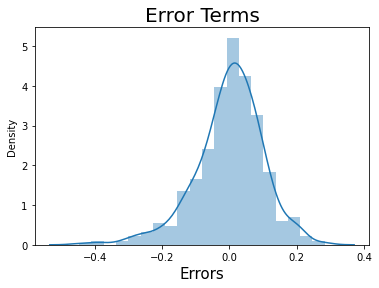

In [223]:
# Plotting the histgram
sns.distplot((res), bins=20)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=15)
plt.show()

##### Inference:
- We can see that the Residuals are normally distributed, which validates our assumption for Linear Regression 

#### For checking patterns in the residuals

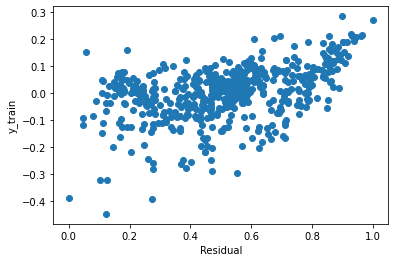

In [224]:
# Creating scatter plot for the residuals
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

##### Inference
-  There are no visible patterns in the error terms and y_train. Hence, the error terms are independent of each other.

#### Homoscedasticity

Text(0, 0.5, 'y_train_pred')

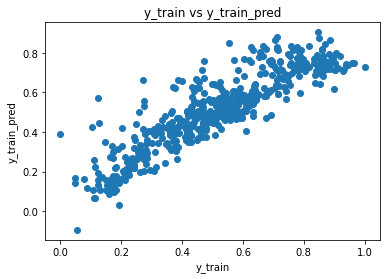

In [225]:
plt.scatter(y_train, y_train_pred)
plt.title('y_train vs y_train_pred')             
plt.xlabel('y_train')                         
plt.ylabel('y_train_pred')

- We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

#### Multicollinearity

In [226]:
# Cheking for the multicollinearity among the predictor variables
# VIF check
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,3.38
3,windspeed,2.90
0,yr,1.89
4,season_2,1.58
5,season_4,1.33
6,mnth_9,1.19
7,weathersit_3,1.07
1,holiday,1.03


##### Inference:
- From the VIF calculation, we can clearly see there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

## Step 6:  Making Prediction using Final Model

### Applying Scaler function

In [227]:
#Using the scaler.transform function for the test data
num_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
196,0,0,1,0.771285,0.741444,0.460557,0.415865,0.678900,0,1,...,0,0,1,0,0,0,0,0,0,0
187,0,0,0,0.854058,0.808256,0.552784,0.292782,0.525771,0,1,...,0,0,0,0,0,0,0,1,0,0
14,0,0,1,0.178804,0.205177,0.340487,0.289684,0.141049,0,0,...,0,0,1,0,0,0,0,0,1,0
31,0,0,1,0.125012,0.186509,0.801018,0.027323,0.153935,0,0,...,0,0,0,0,0,1,0,0,1,0
390,1,0,0,0.320391,0.353539,0.717517,0.077873,0.466291,0,0,...,0,0,0,0,0,0,0,1,1,0


In [228]:
# Statistical Analysis of the test data
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.027397,0.666667,0.537535,0.530211,0.533186,0.365412,0.520493,0.237443,0.260274,...,0.082192,0.091324,0.150685,0.164384,0.150685,0.100457,0.127854,0.150685,0.342466,0.041096
std,0.501140,0.163612,0.472484,0.230350,0.215531,0.206381,0.198115,0.236180,0.426491,0.439789,...,0.275286,0.288730,0.358561,0.371472,0.358561,0.301297,0.334692,0.358561,0.475622,0.198967
min,0.000000,0.000000,0.000000,-0.048868,-0.027173,-0.353829,-0.049874,0.067073,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359598,0.370098,0.386311,0.226618,0.354809,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.564352,0.567870,0.529582,0.327053,0.519673,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.722275,0.693736,0.678414,0.463343,0.723194,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.982573,1.019965,0.986079,1.165056,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividng into X_test and y_test

In [229]:
y_test=df_test.pop('cnt')
X_test=df_test

In [230]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 196 to 200
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [231]:
#Selecting the variables
col1=X_train_new.columns
X_test=X_test[col1]

In [232]:
# Adding constant variable to test df
X_test_sm8=sm.add_constant(X_test)
X_test_sm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 196 to 200
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 11.1 KB


In [233]:
# Making Predictions using the final model
y_pred=lr8_model.predict(X_test_sm8)

## Step 7:  Model Evaluation

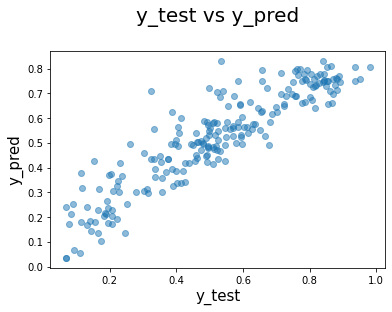

In [234]:
# Plotting y_test and y_pred
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('y_test vs y_pred\n', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)

plt.show()

### R^2 Value for Test data

In [235]:
r2_score(y_test, y_pred)

0.8175281230248297

### Adjusted R^2 Value for Test data

In [236]:
#Shape of the test data
X_test.shape

(219, 8)

In [237]:
# Formula for R^2 adjusted: R^2 adj. = (1−(1−R^2)∗(n−1)/(n−p−1))

# Here, n is the rows & p is the columns

n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.8105768134257756

### Result

##### Train R^2: 0.782
##### Train Adjusted R^2: 0.778
##### Test R^2: 0.817
##### Test Adjusted R^2: 0.810
##### The model seems to have predicted very well

## Conclusion

##### From the final Model, the top 3 Predictor Variables that are needed for the prediction purposes are:
    1. YR 
    2. HOLIDAY 
    3. TEMP
    - YR & TEMP Coefficient of yr & tmp indicates that a unit increase in variable, will increase bike hirings by 0.2234 & 0.5403 values respectively while the HOLIDAY - Coefficient of holiday will decrease the bike hiring by  0.0653 values with the unit increase in the holiday variable.

    
##### The other significant variables to predict the demand for shared:

    - WINDSPEED - Coefficient of the windspeed indicates that a unit increase in windspeed data, will decrease the bike hiring by 0.0954 values.
    - SEASON_3 - Coefficient of season_3 indicates that w.r.t. to Season_1, a unit increase in the season_3, will increase the bike hiring by 0.0746 values.
    - SEASON_4 - Coefficient of season_4 indicates that w.r.t. to Season_1, a unit increase in the season_4, will increase the bike hiring by 0.1175 values.
    - MNTH_9 - Coefficient of mnth_3 indicates that w.r.t. to mnth_1, a unit increase in the mnth_9, will increase the bike hiring by 0.0806 values.
    - WEATHERSIT_3 - Coefficient of weathersit_3 indicates that w.r.t. to weathersit_1, a unit increase in the weathersit_3, will decrease the bike hiring by 0.2338 values.

The details of the variables used are as follows:

- For the weather: 
        - weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy 
        - weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. 
- For the seasons: 
        - season1: spring 
        - season3: fall
        - season4: winter